In [1]:

import datetime

import copy

import random



In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
# plt.style.use('seaborn')
# plt.style.use(['dark_background', 'ggplot'])

import seaborn as sns
# sns.set()

# import scipy
# import scipy.stats as stats


# # sympy = symbolic math in Python
# import sympy as sym
# import sympy.plotting.plot as symplot


# make the equations look nicer

# from IPython.display import display
# display.set_matplotlib_formats('svg') # Deprecated since version 7.23

# import matplotlib_inline
# matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [3]:

import sklearn


# from sklearn.feature_extraction.text import CountVectorizer

# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import OneHotEncoder

# # Modelling
# from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split

# from sklearn.model_selection import GridSearchCV










In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.utils.data import TensorDataset, DataLoader





torch.__version__

'1.12.0+cu113'

In [5]:
random.seed(0)
np.random.seed(0)
torch.manual_seed(0)

In [6]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [7]:
# date = np.datetime64("2000-01-01")
# date_strings = date.astype(str).split('-'). 
# # >> ['2000', '01', '01']

# year_int = int(date_strings[0])

In [8]:
!wget -nc https://raw.githubusercontent.com/Proteinea/dl-challenge-2/main/data/data.txt

--2022-08-02 08:20:58--  https://raw.githubusercontent.com/Proteinea/dl-challenge-2/main/data/data.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5230713 (5.0M) [text/plain]
Saving to: ‘data.txt’

data.txt            100%[===================>]   4.99M  --.-KB/s    in 0.08s   

2022-08-02 08:20:59 (62.2 MB/s) - ‘data.txt’ saved [5230713/5230713]



In [9]:
!ls

data.txt  sample_data


'text.txt'

[ 1-1-1800 to 31-12-2200 ]

[day condition] [month condition] [leap year condition] [decade condition] date

[MON] [DEC] [False] [196] 3-12-1962
[THU] [DEC] [True] [204] 3-12-2048
[WED] [JAN] [False] [181] 10-1-1810

In [10]:
# data = np.loadtxt(open('text.txt','r'),delimiter=' ')
# ori = pd.read_csv('./data/data.txt', sep=' ', header=None)

ori = pd.read_csv('data.txt', sep=' ', header=None)


In [11]:
ori.columns = ['day', 'month', 'leap_year', 'decade', 'date']

In [12]:
ori

,day,month,leap_year,decade,date
0,[WED],[JAN],[False],[180],1-1-1800
1,[THU],[JAN],[False],[180],1-1-1801
2,[FRI],[JAN],[False],[180],1-1-1802
3,[SAT],[JAN],[False],[180],1-1-1803
4,[SUN],[JAN],[True],[180],1-1-1804
...,...,...,...,...,...
146457,[SAT],[DEC],[True],[219],31-12-2196
146458,[SUN],[DEC],[False],[219],31-12-2197
146459,[MON],[DEC],[False],[219],31-12-2198
146460,[TUE],[DEC],[False],[219],31-12-2199


In [13]:
# data.date = pd.to_datetime(data.date, format='%d-%m-%Y', infer_datetime_format=False)
# # pd.to_datetime(data.date, infer_datetime_format=False)

In [14]:
ori.dtypes

day          object
month        object
leap_year    object
decade       object
date         object
dtype: object

In [15]:
# data_backup = copy.deepcopy(ori)
data = copy.deepcopy(ori)

In [16]:
data

,day,month,leap_year,decade,date
0,[WED],[JAN],[False],[180],1-1-1800
1,[THU],[JAN],[False],[180],1-1-1801
2,[FRI],[JAN],[False],[180],1-1-1802
3,[SAT],[JAN],[False],[180],1-1-1803
4,[SUN],[JAN],[True],[180],1-1-1804
...,...,...,...,...,...
146457,[SAT],[DEC],[True],[219],31-12-2196
146458,[SUN],[DEC],[False],[219],31-12-2197
146459,[MON],[DEC],[False],[219],31-12-2198
146460,[TUE],[DEC],[False],[219],31-12-2199


In [17]:
data.date

0           1-1-1800
1           1-1-1801
2           1-1-1802
3           1-1-1803
4           1-1-1804
             ...    
146457    31-12-2196
146458    31-12-2197
146459    31-12-2198
146460    31-12-2199
146461    31-12-2200
Name: date, Length: 146462, dtype: object

In [18]:
# # data['date'] = pd.date_range('3-12-2048', periods=10)
# # data['date'] = pd.date_range('12-3-1962', periods=10)

# # 1-1-1800 to 31-12-2200
# data['date'] = pd.date_range(start='1-1-1800',end='12-31-2200')


data.date = pd.to_datetime(data.date, format='%d-%m-%Y', infer_datetime_format=False)

# # data.date = data.date.dt.strftime('%d-%m-%Y')
# # data.date = pd.to_datetime(data.date.dt.strftime('%d-%m-%Y'), format='%d-%m-%Y', infer_datetime_format=False)



In [19]:
data.dtypes

day                  object
month                object
leap_year            object
decade               object
date         datetime64[ns]
dtype: object

In [20]:
data.date[0]

Timestamp('1800-01-01 00:00:00')

In [21]:
data.date[0].day_of_week

2

In [22]:
data.date[0].day_name()

'Wednesday'

In [23]:
data.date[0].month_name()

'January'

In [24]:
data.date[0].is_leap_year

False

In [25]:
# print(data.date_period[0].day)
# print(data.date_period[0].month)
print(data.date[0].year)

1800


In [26]:
data.date[0].year // 10

180

In [27]:
# for i in range(len(data)):

#     day_str = str(data.date.iloc[i].day_name()[:3].upper())
#     data.day.loc[i] = str(f'[{day_str}]')
    
#     month_str = str(data.date.iloc[i].month_name()[:3].upper())
#     data.month.loc[i] = str(f'[{month_str}]')

#     leap_str = str(data.date.iloc[i].is_leap_year)
#     data.leap_year.loc[i] = str(f'[{leap_str}]')
    
    
#     decade_str = str(data.date.iloc[i].year // 10)
#     data.decade.loc[i] = str(f'[{decade_str}]')
    
    

# data.date = data.date.dt.strftime('%d-%m-%Y')
# data.to_csv('test.txt', sep=' ', header=None, index=False)

In [28]:
data

,day,month,leap_year,decade,date
0,[WED],[JAN],[False],[180],1800-01-01
1,[THU],[JAN],[False],[180],1801-01-01
2,[FRI],[JAN],[False],[180],1802-01-01
3,[SAT],[JAN],[False],[180],1803-01-01
4,[SUN],[JAN],[True],[180],1804-01-01
...,...,...,...,...,...
146457,[SAT],[DEC],[True],[219],2196-12-31
146458,[SUN],[DEC],[False],[219],2197-12-31
146459,[MON],[DEC],[False],[219],2198-12-31
146460,[TUE],[DEC],[False],[219],2199-12-31


In [29]:
data.leap_year = data.leap_year.map({'[False]': float(0),
                                     '[True]' : float(1)})

# data.leap_year = data.leap_year.astype(np.float64)

In [30]:
data

,day,month,leap_year,decade,date
0,[WED],[JAN],0.0,[180],1800-01-01
1,[THU],[JAN],0.0,[180],1801-01-01
2,[FRI],[JAN],0.0,[180],1802-01-01
3,[SAT],[JAN],0.0,[180],1803-01-01
4,[SUN],[JAN],1.0,[180],1804-01-01
...,...,...,...,...,...
146457,[SAT],[DEC],1.0,[219],2196-12-31
146458,[SUN],[DEC],0.0,[219],2197-12-31
146459,[MON],[DEC],0.0,[219],2198-12-31
146460,[TUE],[DEC],0.0,[219],2199-12-31


date -> timestamp

In [31]:
data.date.iloc[0]

Timestamp('1800-01-01 00:00:00')

In [32]:
# data.date.iloc[0].timestamp()

In [33]:
# np.log(data.date.iloc[0].timestamp())

In [34]:
# data['date_timestamp'] = data.date.apply(lambda dt: dt.timestamp())
# data['date_timestamp'] = data.date.apply(lambda dt: dt.timestamp())

In [35]:
# # c = pd.to_datetime(data.date)
# c = data.date

# c

In [36]:
# x = c.dt.strftime("%Y%m%d")
# x = x.astype(np.int64).values.reshape(-1, 1)

# x

In [37]:
data['date_int'] = data['date'].dt.strftime("%Y%m%d").astype(np.int64)

In [38]:
data

,day,month,leap_year,decade,date,date_int
0,[WED],[JAN],0.0,[180],1800-01-01,18000101
1,[THU],[JAN],0.0,[180],1801-01-01,18010101
2,[FRI],[JAN],0.0,[180],1802-01-01,18020101
3,[SAT],[JAN],0.0,[180],1803-01-01,18030101
4,[SUN],[JAN],1.0,[180],1804-01-01,18040101
...,...,...,...,...,...,...
146457,[SAT],[DEC],1.0,[219],2196-12-31,21961231
146458,[SUN],[DEC],0.0,[219],2197-12-31,21971231
146459,[MON],[DEC],0.0,[219],2198-12-31,21981231
146460,[TUE],[DEC],0.0,[219],2199-12-31,21991231


In [39]:
x = data.decade.iloc[0]
x

'[180]'

In [40]:
x.strip('[]')

'180'

In [41]:
data.decade = data.decade.apply(lambda x: x.strip('[]')).astype('int64')

In [42]:
data.day = data.day.apply(lambda x: x.strip('[]'))
data.month = data.month.apply(lambda x: x.strip('[]'))

In [43]:
data

,day,month,leap_year,decade,date,date_int
0,WED,JAN,0.0,180,1800-01-01,18000101
1,THU,JAN,0.0,180,1801-01-01,18010101
2,FRI,JAN,0.0,180,1802-01-01,18020101
3,SAT,JAN,0.0,180,1803-01-01,18030101
4,SUN,JAN,1.0,180,1804-01-01,18040101
...,...,...,...,...,...,...
146457,SAT,DEC,1.0,219,2196-12-31,21961231
146458,SUN,DEC,0.0,219,2197-12-31,21971231
146459,MON,DEC,0.0,219,2198-12-31,21981231
146460,TUE,DEC,0.0,219,2199-12-31,21991231


In [44]:
data.dtypes

day                  object
month                object
leap_year           float64
decade                int64
date         datetime64[ns]
date_int              int64
dtype: object

In [45]:
# data['day_of_week_sin'] = np.sin(data['day'] * (2 * np.pi / 7))
# data['day_of_week_cos'] = np.cos(data['day'] * (2 * np.pi / 7))

In [46]:
# data['month_of_year_sin'] = np.sin(data['month'] * (2 * np.pi / 12))
# data['month_of_year_cos'] = np.cos(data['month'] * (2 * np.pi / 12))

In [47]:
data.day.astype("category").cat.codes

0         6
1         4
2         0
3         2
4         3
         ..
146457    2
146458    3
146459    1
146460    5
146461    6
Length: 146462, dtype: int8

In [48]:
data.day.astype("category").cat.categories

Index(['FRI', 'MON', 'SAT', 'SUN', 'THU', 'TUE', 'WED'], dtype='object')

In [49]:
data.day.astype("category").cat.as_ordered()

0         WED
1         THU
2         FRI
3         SAT
4         SUN
         ... 
146457    SAT
146458    SUN
146459    MON
146460    TUE
146461    WED
Name: day, Length: 146462, dtype: category
Categories (7, object): ['FRI' < 'MON' < 'SAT' < 'SUN' < 'THU' < 'TUE' < 'WED']

In [50]:
data.day.astype("category").cat.codes

0         6
1         4
2         0
3         2
4         3
         ..
146457    2
146458    3
146459    1
146460    5
146461    6
Length: 146462, dtype: int8

In [51]:
# c = pd.Categorical(['a', 'b', 'c', 'a', 'b', 'c'], ordered=True,
#                    categories=['c', 'b', 'a'])

In [52]:
day_code = pd.Categorical(data.day, ordered=True,
                   categories=['SAT', 'SUN', 'MON', 'TUE', 'WED', 'THU', 'FRI'])

In [53]:
['SAT', 'SUN', 'MON', 'TUE', 'WED', 'THU', 'FRI']

['SAT', 'SUN', 'MON', 'TUE', 'WED', 'THU', 'FRI']

In [54]:
data['day_code'] = day_code.codes

In [55]:
for i,c in enumerate(day_code.categories):
    print(i,c)

0 SAT
1 SUN
2 MON
3 TUE
4 WED
5 THU
6 FRI


In [56]:
data

,day,month,leap_year,decade,date,date_int,day_code
0,WED,JAN,0.0,180,1800-01-01,18000101,4
1,THU,JAN,0.0,180,1801-01-01,18010101,5
2,FRI,JAN,0.0,180,1802-01-01,18020101,6
3,SAT,JAN,0.0,180,1803-01-01,18030101,0
4,SUN,JAN,1.0,180,1804-01-01,18040101,1
...,...,...,...,...,...,...,...
146457,SAT,DEC,1.0,219,2196-12-31,21961231,0
146458,SUN,DEC,0.0,219,2197-12-31,21971231,1
146459,MON,DEC,0.0,219,2198-12-31,21981231,2
146460,TUE,DEC,0.0,219,2199-12-31,21991231,3


In [57]:
data['day_sin'] = np.sin(data['day_code'] * (2 * np.pi / 7))
data['day_cos'] = np.cos(data['day_code'] * (2 * np.pi / 7))

In [58]:
data

,day,month,leap_year,decade,date,date_int,day_code,day_sin,day_cos
0,WED,JAN,0.0,180,1800-01-01,18000101,4,-0.433884,-0.900969
1,THU,JAN,0.0,180,1801-01-01,18010101,5,-0.974928,-0.222521
2,FRI,JAN,0.0,180,1802-01-01,18020101,6,-0.781831,0.623490
3,SAT,JAN,0.0,180,1803-01-01,18030101,0,0.000000,1.000000
4,SUN,JAN,1.0,180,1804-01-01,18040101,1,0.781831,0.623490
...,...,...,...,...,...,...,...,...,...
146457,SAT,DEC,1.0,219,2196-12-31,21961231,0,0.000000,1.000000
146458,SUN,DEC,0.0,219,2197-12-31,21971231,1,0.781831,0.623490
146459,MON,DEC,0.0,219,2198-12-31,21981231,2,0.974928,-0.222521
146460,TUE,DEC,0.0,219,2199-12-31,21991231,3,0.433884,-0.900969


In [59]:
month_code = pd.Categorical(data.month, ordered=True,
                   categories=['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC'])

In [60]:
data.month.astype("category").cat.categories

Index(['APR', 'AUG', 'DEC', 'FEB', 'JAN', 'JUL', 'JUN', 'MAR', 'MAY', 'NOV',
       'OCT', 'SEP'],
      dtype='object')

In [61]:
['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']

['JAN',
 'FEB',
 'MAR',
 'APR',
 'MAY',
 'JUN',
 'JUL',
 'AUG',
 'SEP',
 'OCT',
 'NOV',
 'DEC']

In [62]:
data['month_code'] = month_code.codes

In [63]:
for i,m in enumerate(month_code.categories):
    print(i,m)

0 JAN
1 FEB
2 MAR
3 APR
4 MAY
5 JUN
6 JUL
7 AUG
8 SEP
9 OCT
10 NOV
11 DEC


In [64]:
data['month_sin'] = np.sin(data['month_code'] * (2 * np.pi / 12))
data['month_cos'] = np.cos(data['month_code'] * (2 * np.pi / 12))

In [65]:
data

,day,month,leap_year,decade,date,date_int,day_code,day_sin,day_cos,month_code,month_sin,month_cos
0,WED,JAN,0.0,180,1800-01-01,18000101,4,-0.433884,-0.900969,0,0.0,1.000000
1,THU,JAN,0.0,180,1801-01-01,18010101,5,-0.974928,-0.222521,0,0.0,1.000000
2,FRI,JAN,0.0,180,1802-01-01,18020101,6,-0.781831,0.623490,0,0.0,1.000000
3,SAT,JAN,0.0,180,1803-01-01,18030101,0,0.000000,1.000000,0,0.0,1.000000
4,SUN,JAN,1.0,180,1804-01-01,18040101,1,0.781831,0.623490,0,0.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
146457,SAT,DEC,1.0,219,2196-12-31,21961231,0,0.000000,1.000000,11,-0.5,0.866025
146458,SUN,DEC,0.0,219,2197-12-31,21971231,1,0.781831,0.623490,11,-0.5,0.866025
146459,MON,DEC,0.0,219,2198-12-31,21981231,2,0.974928,-0.222521,11,-0.5,0.866025
146460,TUE,DEC,0.0,219,2199-12-31,21991231,3,0.433884,-0.900969,11,-0.5,0.866025


In [66]:
# alpha = len(data.decade.unique())
alpha = (data.decade.iloc[-1] - data.decade.iloc[0]) + 1

data['decade_sin'] = np.sin(data['decade'] * (2 * np.pi / alpha))
data['decade_cos'] = np.cos(data['decade'] * (2 * np.pi / alpha))

In [67]:
data

,day,month,leap_year,decade,date,date_int,day_code,day_sin,day_cos,month_code,month_sin,month_cos,decade_sin,decade_cos
0,WED,JAN,0.0,180,1800-01-01,18000101,4,-0.433884,-0.900969,0,0.0,1.000000,0.636242,-0.771489
1,THU,JAN,0.0,180,1801-01-01,18010101,5,-0.974928,-0.222521,0,0.0,1.000000,0.636242,-0.771489
2,FRI,JAN,0.0,180,1802-01-01,18020101,6,-0.781831,0.623490,0,0.0,1.000000,0.636242,-0.771489
3,SAT,JAN,0.0,180,1803-01-01,18030101,0,0.000000,1.000000,0,0.0,1.000000,0.636242,-0.771489
4,SUN,JAN,1.0,180,1804-01-01,18040101,1,0.781831,0.623490,0,0.0,1.000000,0.636242,-0.771489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146457,SAT,DEC,1.0,219,2196-12-31,21961231,0,0.000000,1.000000,11,-0.5,0.866025,0.839365,-0.543568
146458,SUN,DEC,0.0,219,2197-12-31,21971231,1,0.781831,0.623490,11,-0.5,0.866025,0.839365,-0.543568
146459,MON,DEC,0.0,219,2198-12-31,21981231,2,0.974928,-0.222521,11,-0.5,0.866025,0.839365,-0.543568
146460,TUE,DEC,0.0,219,2199-12-31,21991231,3,0.433884,-0.900969,11,-0.5,0.866025,0.839365,-0.543568


In [68]:
data.dtypes

day                   object
month                 object
leap_year            float64
decade                 int64
date          datetime64[ns]
date_int               int64
day_code                int8
day_sin              float64
day_cos              float64
month_code              int8
month_sin            float64
month_cos            float64
decade_sin           float64
decade_cos           float64
dtype: object

In [69]:
data.day_sin.min(), data.day_sin.max()

(-0.9749279121818236, 0.9749279121818236)

In [70]:
data.day_cos.min(), data.day_cos.max()

(-0.9009688679024191, 1.0)

In [71]:
data.month_sin.min(), data.month_sin.max()

(-1.0, 1.0)

In [72]:
data.month_cos.min(), data.month_cos.max()

(-1.0, 1.0)

In [73]:
data.leap_year.min(), data.leap_year.max()

(0.0, 1.0)

In [74]:
data.decade_sin.min(), data.decade_sin.max()

(-0.9992661810508099, 0.9992661810508101)

In [75]:
data.decade_cos.min(), data.decade_cos.max()

(-0.9970658011837407, 1.0)

In [76]:
data

,day,month,leap_year,decade,date,date_int,day_code,day_sin,day_cos,month_code,month_sin,month_cos,decade_sin,decade_cos
0,WED,JAN,0.0,180,1800-01-01,18000101,4,-0.433884,-0.900969,0,0.0,1.000000,0.636242,-0.771489
1,THU,JAN,0.0,180,1801-01-01,18010101,5,-0.974928,-0.222521,0,0.0,1.000000,0.636242,-0.771489
2,FRI,JAN,0.0,180,1802-01-01,18020101,6,-0.781831,0.623490,0,0.0,1.000000,0.636242,-0.771489
3,SAT,JAN,0.0,180,1803-01-01,18030101,0,0.000000,1.000000,0,0.0,1.000000,0.636242,-0.771489
4,SUN,JAN,1.0,180,1804-01-01,18040101,1,0.781831,0.623490,0,0.0,1.000000,0.636242,-0.771489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146457,SAT,DEC,1.0,219,2196-12-31,21961231,0,0.000000,1.000000,11,-0.5,0.866025,0.839365,-0.543568
146458,SUN,DEC,0.0,219,2197-12-31,21971231,1,0.781831,0.623490,11,-0.5,0.866025,0.839365,-0.543568
146459,MON,DEC,0.0,219,2198-12-31,21981231,2,0.974928,-0.222521,11,-0.5,0.866025,0.839365,-0.543568
146460,TUE,DEC,0.0,219,2199-12-31,21991231,3,0.433884,-0.900969,11,-0.5,0.866025,0.839365,-0.543568


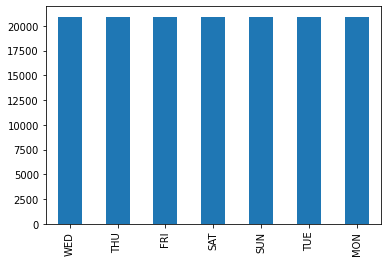

In [77]:
data.day.value_counts().plot(kind="bar")

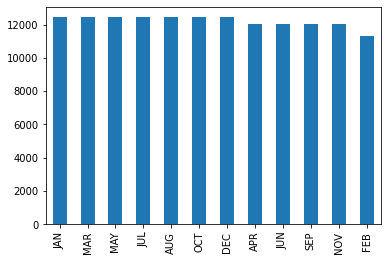

In [78]:
data.month.value_counts().plot(kind="bar")

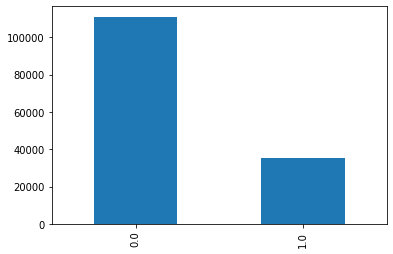

In [79]:
data.leap_year.value_counts().plot(kind="bar")

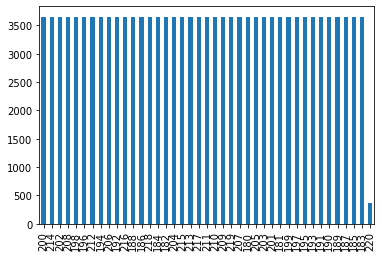

In [80]:
data.decade.value_counts().plot(kind="bar")

In [81]:
data

,day,month,leap_year,decade,date,date_int,day_code,day_sin,day_cos,month_code,month_sin,month_cos,decade_sin,decade_cos
0,WED,JAN,0.0,180,1800-01-01,18000101,4,-0.433884,-0.900969,0,0.0,1.000000,0.636242,-0.771489
1,THU,JAN,0.0,180,1801-01-01,18010101,5,-0.974928,-0.222521,0,0.0,1.000000,0.636242,-0.771489
2,FRI,JAN,0.0,180,1802-01-01,18020101,6,-0.781831,0.623490,0,0.0,1.000000,0.636242,-0.771489
3,SAT,JAN,0.0,180,1803-01-01,18030101,0,0.000000,1.000000,0,0.0,1.000000,0.636242,-0.771489
4,SUN,JAN,1.0,180,1804-01-01,18040101,1,0.781831,0.623490,0,0.0,1.000000,0.636242,-0.771489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146457,SAT,DEC,1.0,219,2196-12-31,21961231,0,0.000000,1.000000,11,-0.5,0.866025,0.839365,-0.543568
146458,SUN,DEC,0.0,219,2197-12-31,21971231,1,0.781831,0.623490,11,-0.5,0.866025,0.839365,-0.543568
146459,MON,DEC,0.0,219,2198-12-31,21981231,2,0.974928,-0.222521,11,-0.5,0.866025,0.839365,-0.543568
146460,TUE,DEC,0.0,219,2199-12-31,21991231,3,0.433884,-0.900969,11,-0.5,0.866025,0.839365,-0.543568


['day_sin', 'day_cos', 'month_sin', 'month_cos', 'leap_year', 'decade_scaled']
['date_timestamp_scaled']

In [82]:
# fig,ax = plt.subplots(1,figsize=(17,4))
# ax = sns.boxplot(data=data[['day_sin', 'day_cos', 'month_sin', 'month_cos', 'leap_year', 'decade_scaled']])
# ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
# plt.show()

In [83]:
# fig,ax = plt.subplots(1,figsize=(17,4))
# ax = sns.boxplot(data=data[['leap_year']])
# ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
# plt.show()

In [84]:
X = data[['day_sin', 'day_cos', 'month_sin', 'month_cos', 'leap_year', 'decade_sin', 'decade_cos']].values
X

array([[-0.43388374, -0.90096887,  0.        , ...,  0.        ,
         0.63624244, -0.77148918],
       [-0.97492791, -0.22252093,  0.        , ...,  0.        ,
         0.63624244, -0.77148918],
       [-0.78183148,  0.6234898 ,  0.        , ...,  0.        ,
         0.63624244, -0.77148918],
       ...,
       [ 0.97492791, -0.22252093, -0.5       , ...,  0.        ,
         0.83936543, -0.54356755],
       [ 0.43388374, -0.90096887, -0.5       , ...,  0.        ,
         0.83936543, -0.54356755],
       [-0.43388374, -0.90096887, -0.5       , ...,  0.        ,
         0.74655322, -0.6653257 ]])

In [85]:
len(X)

146462

In [86]:
X.shape

(146462, 7)

In [88]:
# Y = data['date_int'].values.reshape(-1, 1)
# Y = np.log(data['date_int'].values.reshape(-1, 1))
Y = data['date_int'].values.reshape(-1, 1) / data['date_int'].max()


Y

array([[0.81814063],
       [0.81859515],
       [0.81904967],
       ...,
       [0.99909096],
       [0.99954548],
       [1.        ]])

In [89]:
len(Y)

146462

In [90]:
Y.shape

(146462, 1)

In [91]:
# # leap = np.where(~X['leap_year'] == 1)[0]
# leap = np.where(X['leap_year'] == 1)[0]

# leap

In [92]:
train_data, test_data, train_labels, test_labels = train_test_split(X, Y, test_size=0.3, shuffle=True,
                                                                    random_state=0)

In [93]:
train_dataT = TensorDataset(torch.Tensor(train_data), torch.Tensor(train_labels))

test_dataT  = TensorDataset(torch.Tensor(test_data), torch.Tensor(test_labels))



batchsize = 32

train_loader = DataLoader(train_dataT, batch_size=batchsize, drop_last=True)

test_loader  = DataLoader(test_dataT)


In [94]:
print(f'X: {X.shape}\n')
print(f'Y: {Y.shape}\n')

print(f'Train data:   {train_data.shape}\n')
print(f'Train labels: {train_labels.shape}\n')
print(f'Test data:    {test_data.shape}\n')
print(f'Test labels:  {test_labels.shape}')

X: (146462, 7)

Y: (146462, 1)

Train data:   (102523, 7)

Train labels: (102523, 1)

Test data:    (43939, 7)

Test labels:  (43939, 1)


In [95]:
class Model(nn.Module):
    
    def __init__(self):
        super().__init__()

        self.input = nn.Linear(7, 32)

        self.fc1 = nn.Linear(32, 128)
        self.bnorm1 = nn.BatchNorm1d(128)

        self.fc2 = nn.Linear(128, 512)
        self.bnorm2 = nn.BatchNorm1d(512)

        self.fc3 = nn.Linear(512, 64)
        self.bnorm3 = nn.BatchNorm1d(64)

        self.fc4 = nn.Linear(64, 10)
        self.bnorm4 = nn.BatchNorm1d(10)


        self.output = nn.Linear(10, 1)



    def forward(self, x):


        # print(f'training={self.training}')

        x = F.relu( self.input(x) )

        x = F.relu(self.bnorm1(self.fc1(x)))
        x = F.dropout(x, p=0.25, training=self.training)

        x = F.relu(self.bnorm2(self.fc2(x)))
        x = F.dropout(x, p=0.4, training=self.training)

        x = F.relu(self.bnorm3(self.fc3(x)))
        x = F.dropout(x, p=0.1, training=self.training)

        x = F.relu(self.bnorm4(self.fc4(x)))
        x = F.dropout(x, p=0.05, training=self.training)


        x = F.relu(self.output(x))


        return x
        


In [96]:
# test_x, test_y = next(iter(train_loader))

# print(f'X: {X.shape}\n')
# print(f'Y: {Y.shape}\n')



In [97]:
model = Model().to(device)

# test_hat = model(torch.randn(32,6))
# test_hat = model(test_x)

# print(test_hat.shape)

In [98]:
# for p in list(model.named_parameters()):
#     if 'weight' in p[0] and 'bnorm' not in p[0]:
#         nn.init.xavier_normal_(p[1].data)
#         print(p[0])
#         print(p[1].data.shape)

In [99]:
lossfun = nn.MSELoss()

# optimizer = torch.optim.Adam(model.parameters(), lr=0.0002, betas=(0.5, 0.999), weight_decay=1e-5)
# optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.5, 0.999), weight_decay=1e-1)
# optimizer = torch.optim.Adam(model.parameters(), lr=0.0001, weight_decay=1e-5)

# optimizer = torch.optim.Adam(model.parameters(), lr=0.0001, betas=(0.9, 0.999), weight_decay=1e-9)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9, 0.999), weight_decay=1e-3)
# optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9, 0.999))
# optimizer = torch.optim.Adam(model.parameters(), lr=0.01)





In [100]:
numepochs = 120

trainLoss = torch.zeros(numepochs)
testLoss   = torch.zeros(numepochs)
trainAcc  = torch.zeros(numepochs)
testAcc    = torch.zeros(numepochs)


for epochi in range(numepochs):
    
    model.train() # switch to train mode

    batchLoss = []
    batchAcc  = []

    for X,y in train_loader:

        X = X.to(device)
        y = y.to(device)

        yHat = model(X)
        loss = lossfun(yHat, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        batchLoss.append(loss.item())
        batchAcc.append( torch.mean(( yHat == y).float() ).item() )
        
        
    
    trainLoss[epochi] = np.mean(batchLoss)
    trainAcc[epochi]  = 100*np.mean(batchAcc)


    
    model.eval() # switch to test mode
    
    XX,yy = next(iter(test_loader))

    XX = XX.to(device)
    yy = yy.to(device)

    # forward pass and loss
    with torch.no_grad():
        yHat_test = model(XX)
        loss = lossfun(yHat_test, yy)


    testLoss[epochi] = loss.item()
    testAcc[epochi]  = 100*torch.mean( (yHat_test == yy).float() ).item()

    # if (epochi + 1) % 5 == 0:
    print(f'Epoch {epochi+1}/{numepochs}, Train Loss: {loss.item():.4f}, Test Loss: {loss.item():0.4f}')


Epoch 1/120, Train Loss: 0.0001, Test Loss: 0.0001
Epoch 2/120, Train Loss: 0.0003, Test Loss: 0.0003
Epoch 3/120, Train Loss: 0.0002, Test Loss: 0.0002
Epoch 4/120, Train Loss: 0.0002, Test Loss: 0.0002
Epoch 5/120, Train Loss: 0.0002, Test Loss: 0.0002


KeyboardInterrupt: ignored

In [102]:
# trainLoss, testLoss, trainAcc, testAcc

In [103]:
# yHat.shape, y.shape

In [104]:
# yHat_test.shape, yy.shape

In [105]:
yHat.flatten(), y.flatten()

(tensor([0.9723, 0.9649, 0.8877, 0.8420, 0.8452, 0.9542, 0.8831, 0.9636, 0.9577,
         0.9902, 0.9531, 0.9875, 0.9926, 0.9266, 0.8449, 0.8420, 0.8763, 0.9204,
         0.8846, 0.9537, 0.8521, 0.9461, 0.8936, 0.8420, 0.8530, 0.9605, 0.8420,
         0.8869, 0.8673, 0.9214, 0.8451, 0.8425],
        grad_fn=<ReshapeAliasBackward0>),
 tensor([0.9936, 0.9795, 0.8732, 0.8372, 0.8377, 0.9436, 0.8814, 0.9409, 0.9591,
         0.9913, 0.9427, 0.9763, 0.9913, 0.9264, 0.8468, 0.8231, 0.8950, 0.9082,
         0.8840, 0.9331, 0.8568, 0.9422, 0.9200, 0.8377, 0.8441, 0.9513, 0.8486,
         0.8950, 0.8654, 0.9050, 0.8313, 0.8573]))

In [106]:
yHat_test, yy

(tensor([[0.8405]]), tensor([[0.8254]]))

In [107]:
# np.exp(yy).round()

In [108]:
# np.exp(yHat_test).round()

In [109]:
(yy * data['date_int'].max()).round()

tensor([[18160602.]])

In [110]:
(yHat_test * data['date_int'].max()).round()

tensor([[18491480.]])

In [ ]:
data

,day,month,leap_year,decade,date,date_timestamp,day_code,day_sin,day_cos,month_code,month_sin,month_cos,decade_sin,decade_cos,date_timestamp_scaled
0,WED,JAN,0.0,180,1800-01-01,-5.364662e+09,4,-0.433884,-0.900969,0,0.0,1.000000,0.636242,-0.771489,-1.000000
1,THU,JAN,0.0,180,1801-01-01,-5.333126e+09,5,-0.974928,-0.222521,0,0.0,1.000000,0.636242,-0.771489,-0.995016
2,FRI,JAN,0.0,180,1802-01-01,-5.301590e+09,6,-0.781831,0.623490,0,0.0,1.000000,0.636242,-0.771489,-0.990031
3,SAT,JAN,0.0,180,1803-01-01,-5.270054e+09,0,0.000000,1.000000,0,0.0,1.000000,0.636242,-0.771489,-0.985047
4,SUN,JAN,1.0,180,1804-01-01,-5.238518e+09,1,0.781831,0.623490,0,0.0,1.000000,0.636242,-0.771489,-0.980063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146457,SAT,DEC,1.0,219,2196-12-31,7.163424e+09,0,0.000000,1.000000,11,-0.5,0.866025,0.839365,-0.543568,0.980063
146458,SUN,DEC,0.0,219,2197-12-31,7.194960e+09,1,0.781831,0.623490,11,-0.5,0.866025,0.839365,-0.543568,0.985047
146459,MON,DEC,0.0,219,2198-12-31,7.226496e+09,2,0.974928,-0.222521,11,-0.5,0.866025,0.839365,-0.543568,0.990031
146460,TUE,DEC,0.0,219,2199-12-31,7.258032e+09,3,0.433884,-0.900969,11,-0.5,0.866025,0.839365,-0.543568,0.995016


In [ ]:
x = c.dt.strftime("%Y%m%d")
x = x.astype(np.int64).values.reshape(-1, 1)

x

array([[18000101],
       [18010101],
       [18020101],
       ...,
       [21981231],
       [21991231],
       [22001231]], dtype=int64)

In [ ]:
datetime.datetime.strptime('18000101', "%Y%m%d")

datetime.datetime(1800, 1, 1, 0, 0)

In [ ]:
ss = RobustScaler()

In [ ]:
out = ss.fit_transform(x)

In [ ]:
out

array([[-1.00000975],
       [-0.9950112 ],
       [-0.99001265],
       ...,
       [ 0.98997716],
       [ 0.99497571],
       [ 0.99997426]])

In [ ]:
prev = ss.inverse_transform([[-0.9950112]]).round()
prev

array([[18010101.]])

In [ ]:
prev

array([[18010101.]])

In [ ]:
c

0        1800-01-01
1        1801-01-01
2        1802-01-01
3        1803-01-01
4        1804-01-01
            ...    
146457   2196-12-31
146458   2197-12-31
146459   2198-12-31
146460   2199-12-31
146461   2200-12-31
Name: date, Length: 146462, dtype: datetime64[ns]

In [ ]:
x = np.array([18000101])
# x = np.array([21971231])

In [ ]:
l = np.log(x)
l = np.array([16.7059])

l

array([16.7059])

In [ ]:
np.exp(l).round()

array([18000318.])

In [ ]:
np.exp(l).round() == x

array([ True])

In [ ]:
np.array(c.dt.to_pydatetime(), dtype=np.datetime64)

array(['1800-01-01T00:00:00.000000', '1801-01-01T00:00:00.000000',
       '1802-01-01T00:00:00.000000', ..., '2198-12-31T00:00:00.000000',
       '2199-12-31T00:00:00.000000', '2200-12-31T00:00:00.000000'],
      dtype='datetime64[us]')

In [ ]:
pd.to_datetime('1970-01-01').value

0

In [ ]:
np.log(data.date_int.values)[:10]

array([16.70588793, 16.70644333, 16.70699842, 16.7075532 , 16.70810767,
       16.70866184, 16.7092157 , 16.70976925, 16.7103225 , 16.71087544])

In [ ]:
np.exp([[16.7092157]]).round()

array([[18060101.]])